### Question 4: Education level
Is that true DS have higher degree requirement than software engineer?

In [1]:
# setup
import pandas as pd
import numpy as np
import clean_data as c
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# load data
data = pd.read_pickle('data')
print(data.columns)

Index(['Respondent', 'is_DS_ML', 'is_DA', 'is_DEV', 'is_full_time',
       'is_student', 'edlevel', 'major', 'salary', 'salary_freq', 'country',
       'salary_annual', 'company_size', 'JobSat', 'year'],
      dtype='object')


In [3]:
# Explore the education level
print(data['edlevel'].value_counts())

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              82793
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           40965
Some college/university study without earning a degree                                22212
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    17593
Associate degree                                                                       5908
Other doctoral degree (Ph.D, Ed.D., etc.)                                              4646
Primary/elementary school                                                              3078
Professional degree (JD, MD, etc.)                                                     2645
I never completed any formal education                                                 1253
Name: edlevel, dtype: int64


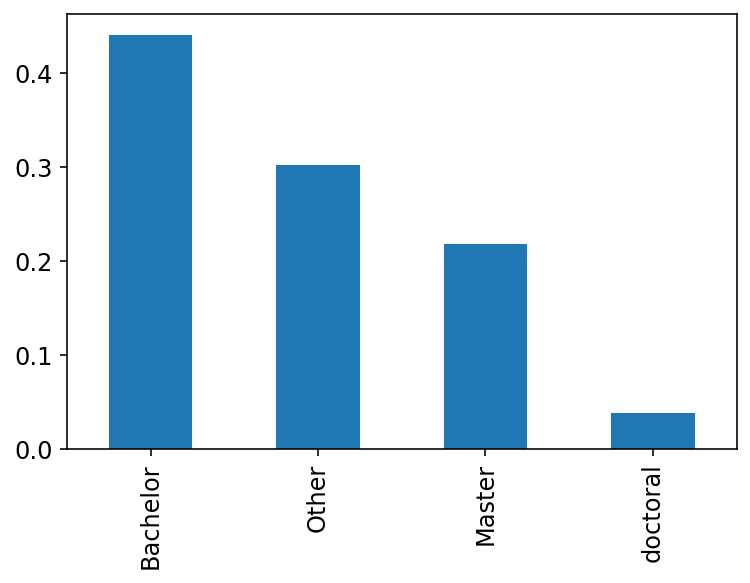

In [4]:
# Divide education level into four categories
data['edlevel1'] = 'Other'
data.loc[data['edlevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)','edlevel1'] = 'Bachelor'
data.loc[data['edlevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)','edlevel1'] = 'Master'
data.loc[(data['edlevel'] == 'Professional degree (JD, MD, etc.)')
         |(data['edlevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
         'edlevel1'] = 'Doctoral'

data['edlevel1'] = 'Other'
data.loc[data['edlevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)','edlevel1'] = 'Bachelor'
data.loc[data['edlevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)','edlevel1'] = 'Master'
data.loc[(data['edlevel'] == 'Professional degree (JD, MD, etc.)')
         |(data['edlevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
         'edlevel1'] = 'doctoral'
data.edlevel1.value_counts(normalize=True).plot(kind='bar')
plt.show()

Saving figure Education_level


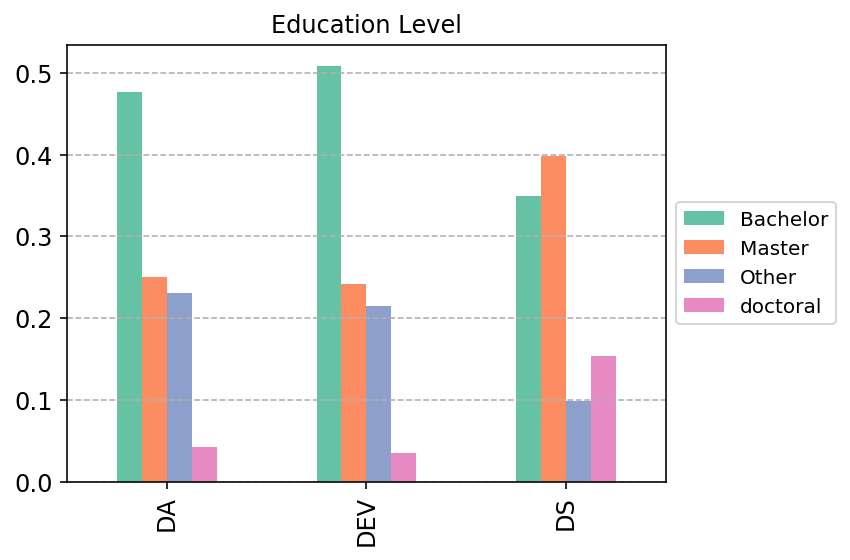

In [5]:
# plot proportions of different education levels 
# in different occupations (DA, DEV, DS)

# prepare data
data1 = data[data.is_full_time].copy()
data1['professional'] = 'DEV'  # developer
data1.loc[data1.is_DA, 'professional'] = 'DA' # data analyst
data1.loc[data1.is_DS_ML, 'professional'] = 'DS' # data scientist

# plot
fig,ax=plt.subplots()
color = np.array(sns.color_palette("Set2", 4))
(data1.groupby(['professional'])['edlevel1']
 .value_counts(normalize=True).unstack().plot(kind='bar', 
                                                          ax=ax,  
                                                          color=color))
ax.grid(True, axis='y', linestyle='--')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('')
ax.set_title('Education Level')
save_fig('Education_level')

Saving figure Education_level_US


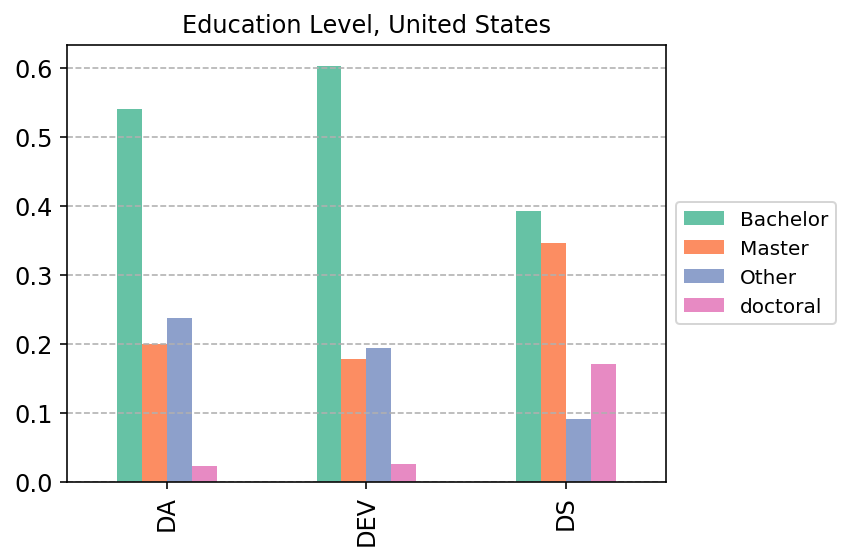

In [6]:
# United states
fig,ax=plt.subplots()
color = np.array(sns.color_palette("Set2", 4))
(data1[data1['country']=='United States'].groupby(['professional'])['edlevel1']
 .value_counts(normalize=True).unstack().plot(kind='bar', 
                                                          ax=ax,  
                                                          color=color))
ax.grid(True, axis='y', linestyle='--')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('')
ax.set_title('Education Level, United States')
save_fig('Education_level_US')

### Question 5: Education background
which job are more friendly with other majors like natural science? 

Saving figure major


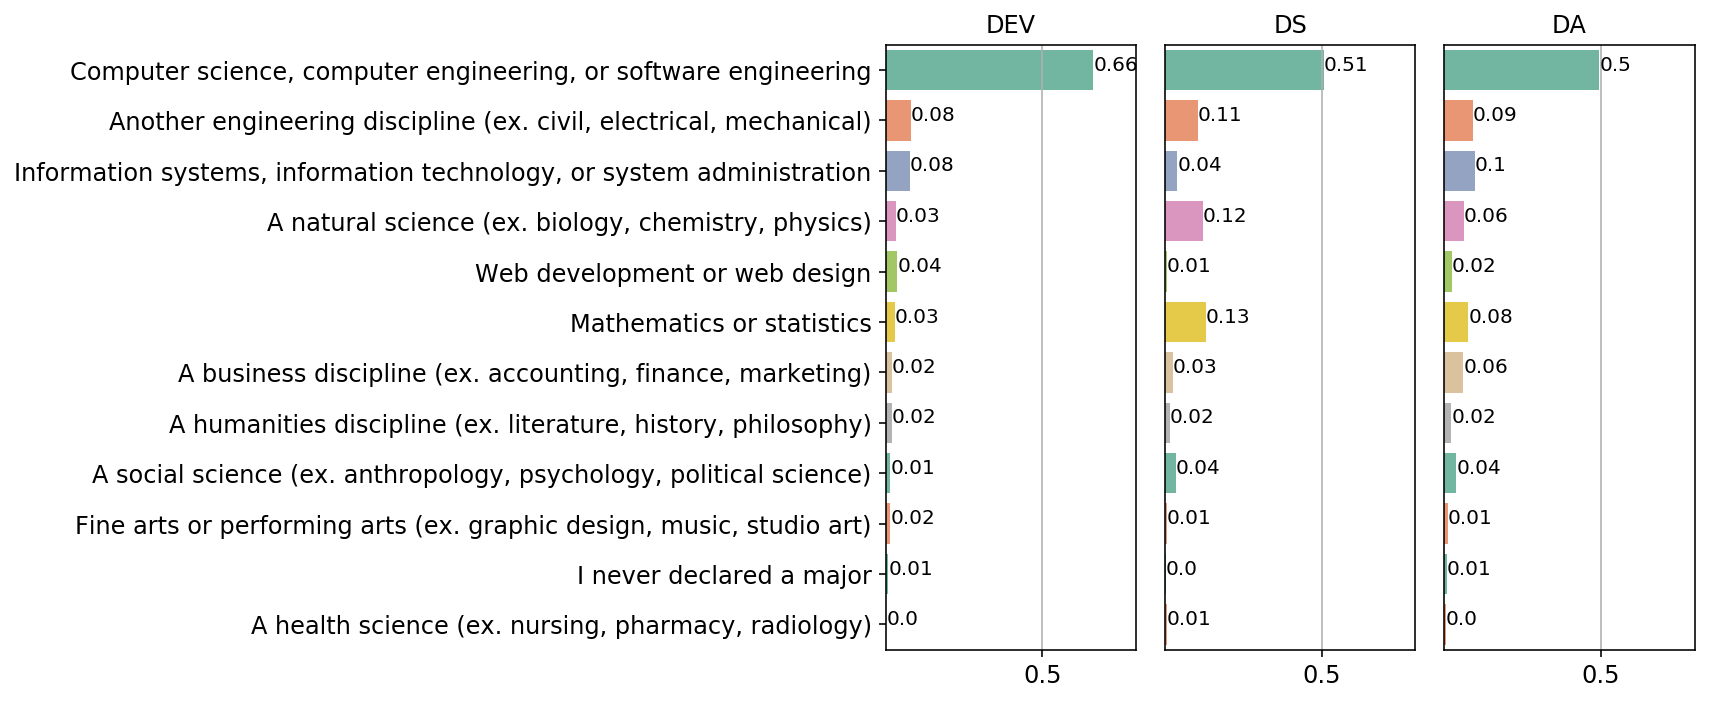

In [7]:
fig, ax = plt.subplots(1,3, figsize=(12, 5))
#mpl.rc('ytick', labelsize=9)
order = data.major.value_counts().index.values
tmp = data[(data['is_DEV'] == True) 
            & (data['is_full_time'] == True)]
props = (tmp['major'].value_counts(normalize=True).reset_index().
         rename(columns={'index': 'category','major': 'percent'}))
sns.barplot(x = 'percent', y = 'category', data=props, ax=ax[0],
            palette = sns.color_palette("Set2", 10), order=order)

c.add_number(ax[0], props, order)   
ax[0].set(xlabel='',
            title='DEV',
            ylabel='',
            xticks=[0.5],
            xlim = (0, 0.8))
ax[0].grid(True, axis='x')


# subplot 1
tmp = data[(data['is_DS_ML'] == True) 
            & (data['is_full_time'] == True)]
props = (tmp['major'].value_counts(normalize=True).reset_index().
         rename(columns={'index': 'category','major': 'percent'}))
sns.barplot(x = 'percent', y = 'category', data=props, ax=ax[1],
            palette = sns.color_palette("Set2", 10), order=order)

c.add_number(ax[1], props, order)   
ax[1].set(xlabel='',
            title='DS',
            ylabel='',
            yticks=[],
            xticks=[0.5],
            xlim = (0, 0.8))
ax[1].grid(True, axis='x')

# subplot 3
tmp = data[(data['is_DA'] == True) 
            & (data['is_full_time'] == True)]
props = (tmp['major'].value_counts(normalize=True).reset_index().
         rename(columns={'index': 'category','major': 'percent'}))
sns.barplot(x = 'percent', y = 'category', data=props, ax=ax[2],
            palette = sns.color_palette("Set2", 10), order=order)

c.add_number(ax[2], props, order)   
ax[2].set(xlabel='',
            title='DA',
            ylabel='',
            yticks=[],
            xticks=[0.5],
            xlim = (0, 0.8))
ax[2].grid(True, axis='x')
save_fig('major')
plt.show()